### LOAD THE DATA SET AND ANALYZE THE FEATURES AND LABELS

In [1]:
#load the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
## load the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
## check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# describe the dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


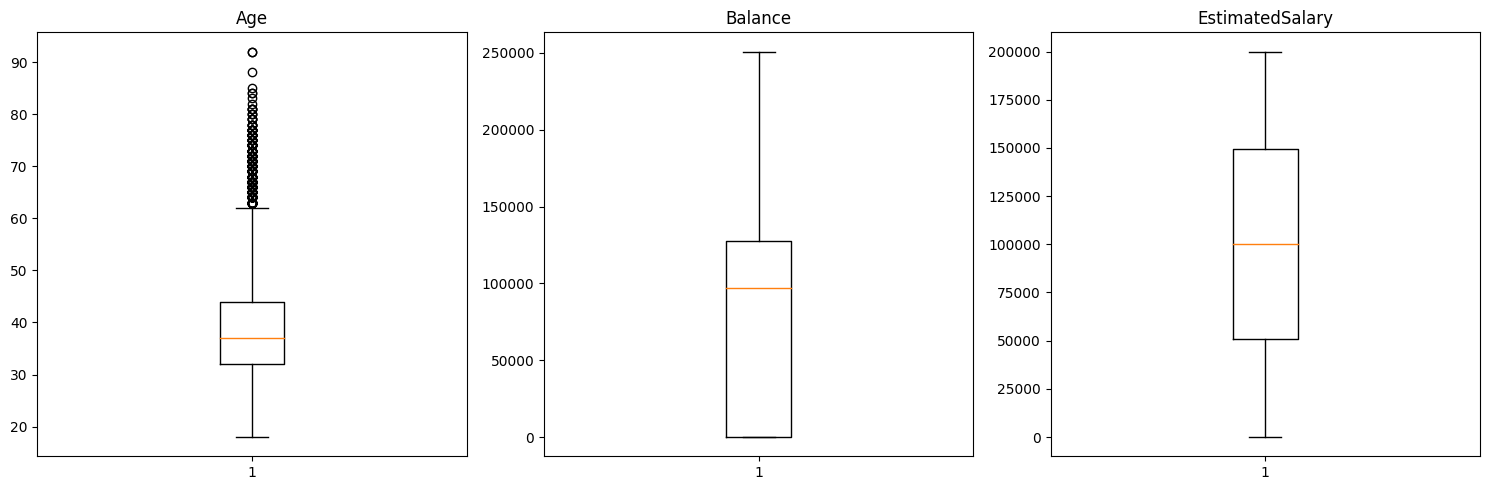

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64
HasCrCard         2
IsActiveMember    2
Exited            2
dtype: int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


In [5]:
import matplotlib.pyplot as plt

# Outlier Detection and Handling (Age, Balance, EstimatedSalary)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df['Age'])
plt.title('Age')

plt.subplot(1, 3, 2)
plt.boxplot(df['Balance'])
plt.title('Balance')

plt.subplot(1, 3, 3)
plt.boxplot(df['EstimatedSalary'])
plt.title('EstimatedSalary')

plt.tight_layout()
plt.show()

# Data Consistency (Geography, Gender)
print(df['Geography'].value_counts())
print(df['Gender'].value_counts())

df['Geography'] = df['Geography'].str.lower().str.capitalize()
df['Gender'] = df['Gender'].str.lower().str.capitalize()

# Feature Encoding (HasCrCard, IsActiveMember, Exited)
# Check if already encoded
print(df[['HasCrCard', 'IsActiveMember', 'Exited']].apply(pd.Series.nunique))


# Data Type Validation
print(df.dtypes)

In [6]:
import pandas as pd
from scipy.stats import chi2_contingency

# 1. Descriptive statistics grouped by churn status
print("Descriptive statistics grouped by churn status:")
display(df.groupby('Exited')[['Age', 'Balance', 'EstimatedSalary', 'Tenure', 'CreditScore']].agg(['mean', 'std', 'min', 'max']))


# 2. Correlation coefficients
print("\nCorrelation coefficients with 'Exited':")
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
display(df[numerical_cols + ['Exited']].corr()['Exited'].abs().sort_values(ascending=False))


# 3. Chi-squared tests
print("\nChi-squared test results:")
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    contingency_table = pd.crosstab(df[col], df['Exited'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"\n{col}:")
    print(f"  Chi2 statistic: {chi2}")
    print(f"  P-value: {p}")
    print(f"  Degrees of freedom: {dof}")

Descriptive statistics grouped by churn status:


Age                          Balance                     \
             mean        std min max          mean           std  min   
Exited                                                                  
0       37.408389  10.125363  18  92  72745.296779  62848.040701  0.0   
1       44.837997   9.761562  18  84  91108.539337  58360.794816  0.0   

                  EstimatedSalary                                    Tenure  \
              max            mean           std    min        max      mean   
Exited                                                                        
0       221532.80    99738.391772  57405.586966  90.07  199992.48  5.033279   
1       250898.09   101465.677531  57912.418071  11.58  199808.10  4.932744   

                         CreditScore                        
             std min max        mean         std  min  max  
Exited                                                      
0       2.880658   0  10  651.853196   95.653837  405  850  
1       2.936106   0  10  645.351497  100.321503  350  850


Correlation coefficients with 'Exited':


Exited             1.000000
Age                0.285323
Balance            0.118533
NumOfProducts      0.047820
CreditScore        0.027094
Tenure             0.014001
EstimatedSalary    0.012097
Name: Exited, dtype: float64


Chi-squared test results:

Geography:
  Chi2 statistic: 301.25533682434536
  P-value: 3.8303176053541544e-66
  Degrees of freedom: 2

Gender:
  Chi2 statistic: 112.91857062096116
  P-value: 2.2482100097131755e-26
  Degrees of freedom: 1

HasCrCard:
  Chi2 statistic: 0.47133779904440803
  P-value: 0.49237236141554686
  Degrees of freedom: 1

IsActiveMember:
  Chi2 statistic: 242.98534164287963
  P-value: 8.785858269303703e-55
  Degrees of freedom: 1


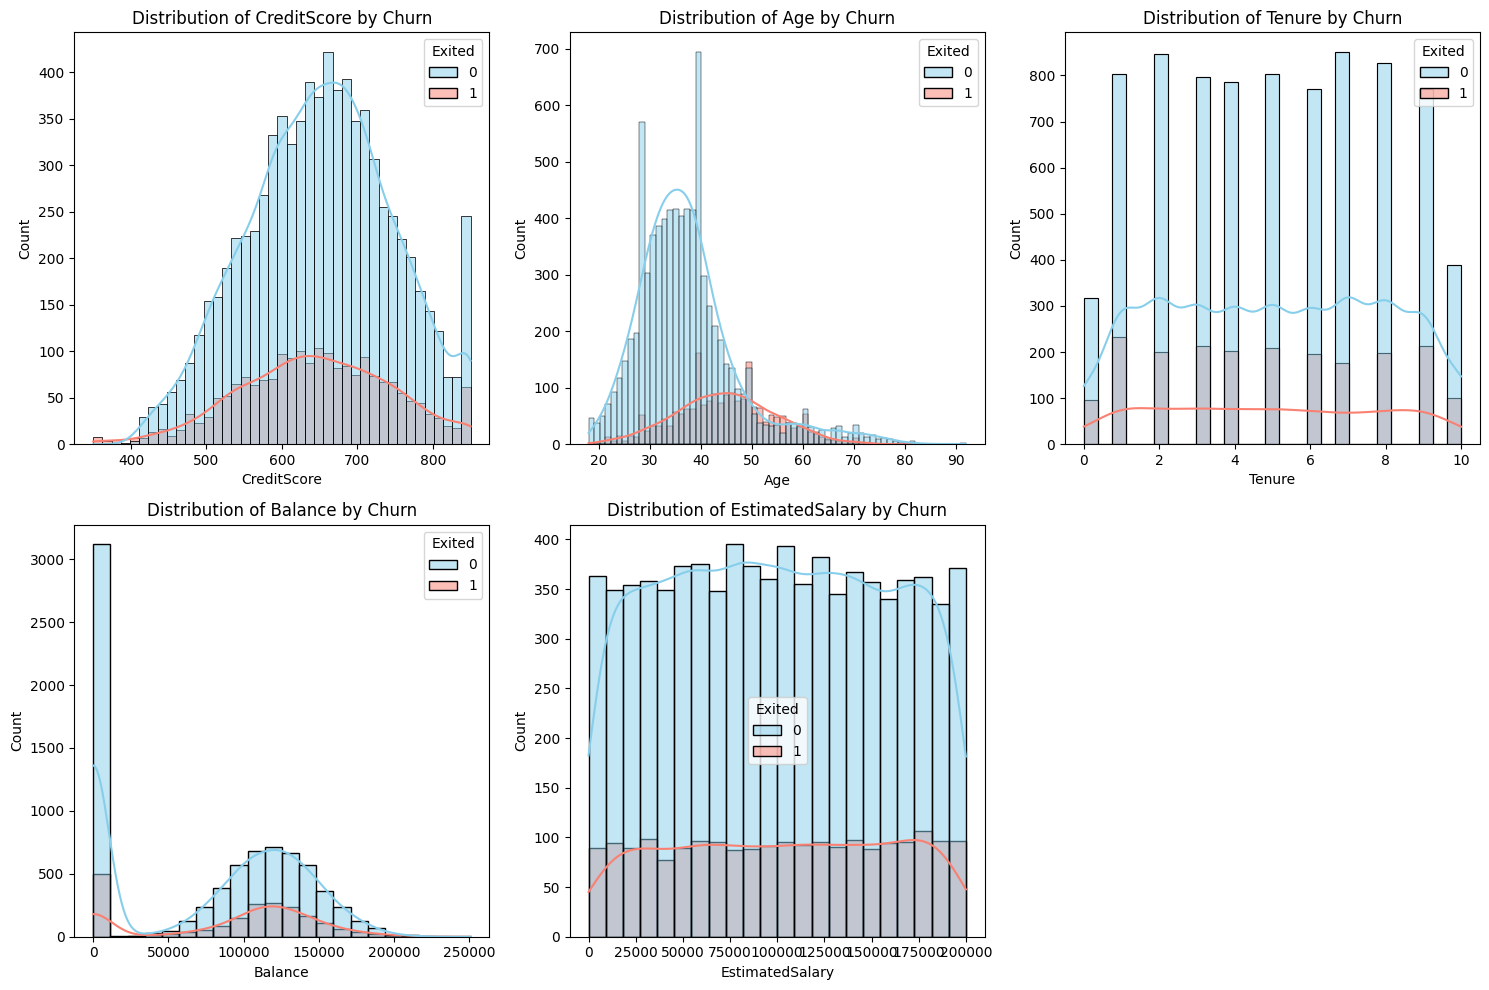

C:\Users\VARUN BHATIA\AppData\Local\Temp\ipykernel_17564\69390305.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
C:\Users\VARUN BHATIA\AppData\Local\Temp\ipykernel_17564\69390305.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
C:\Users\VARUN BHATIA\AppData\Local\Temp\ipykernel_17564\69390305.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
C:\Users\VARU

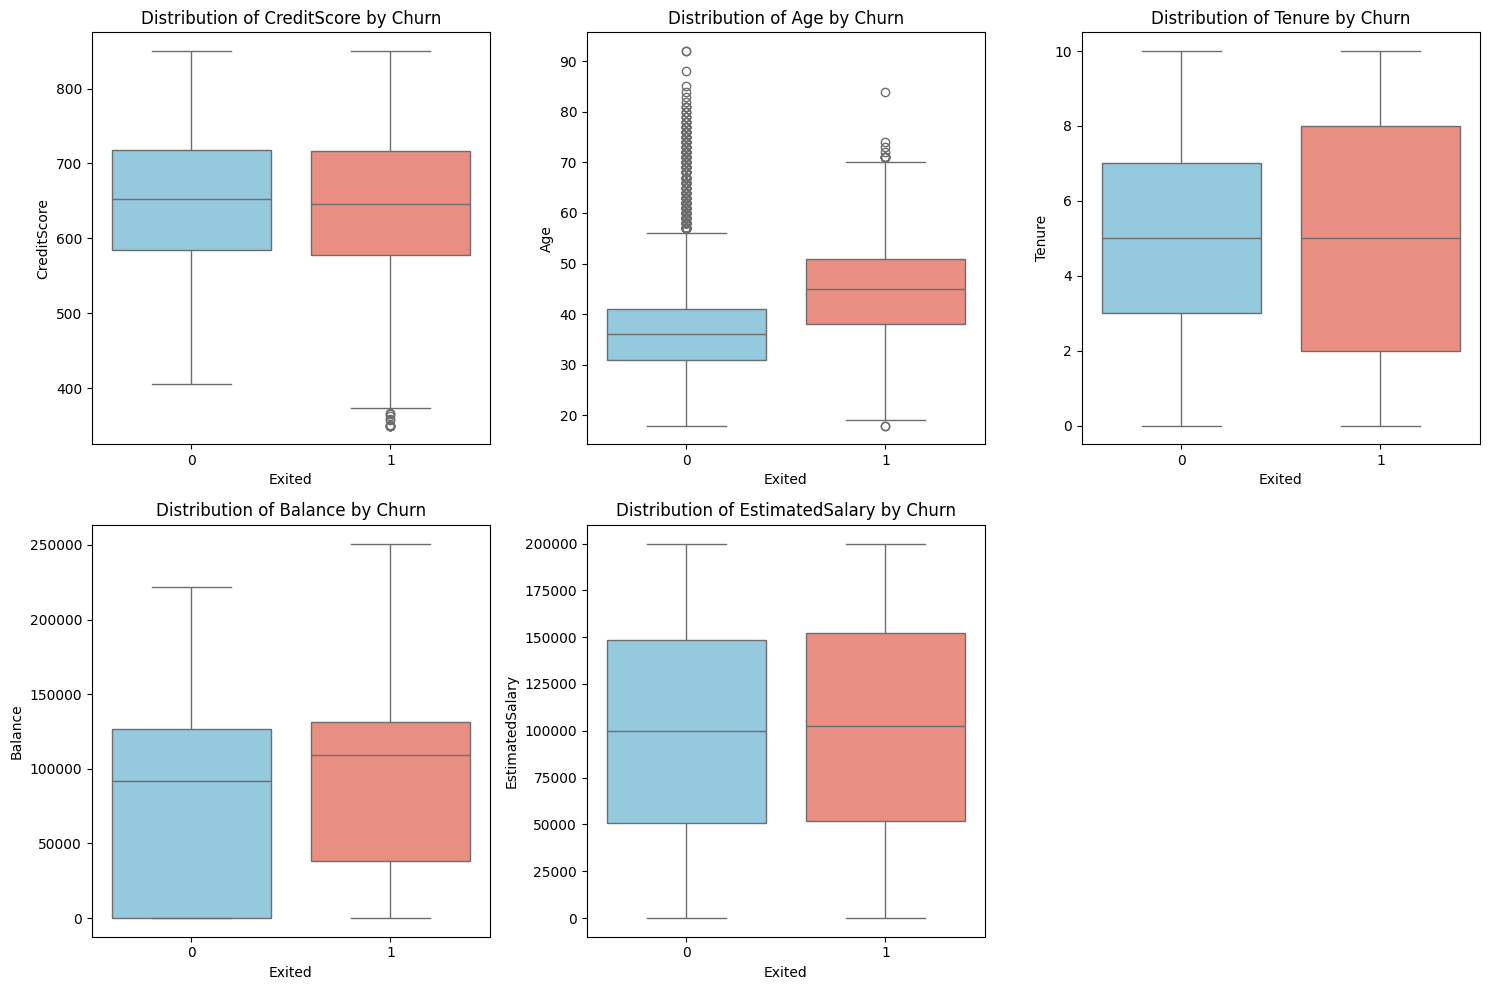

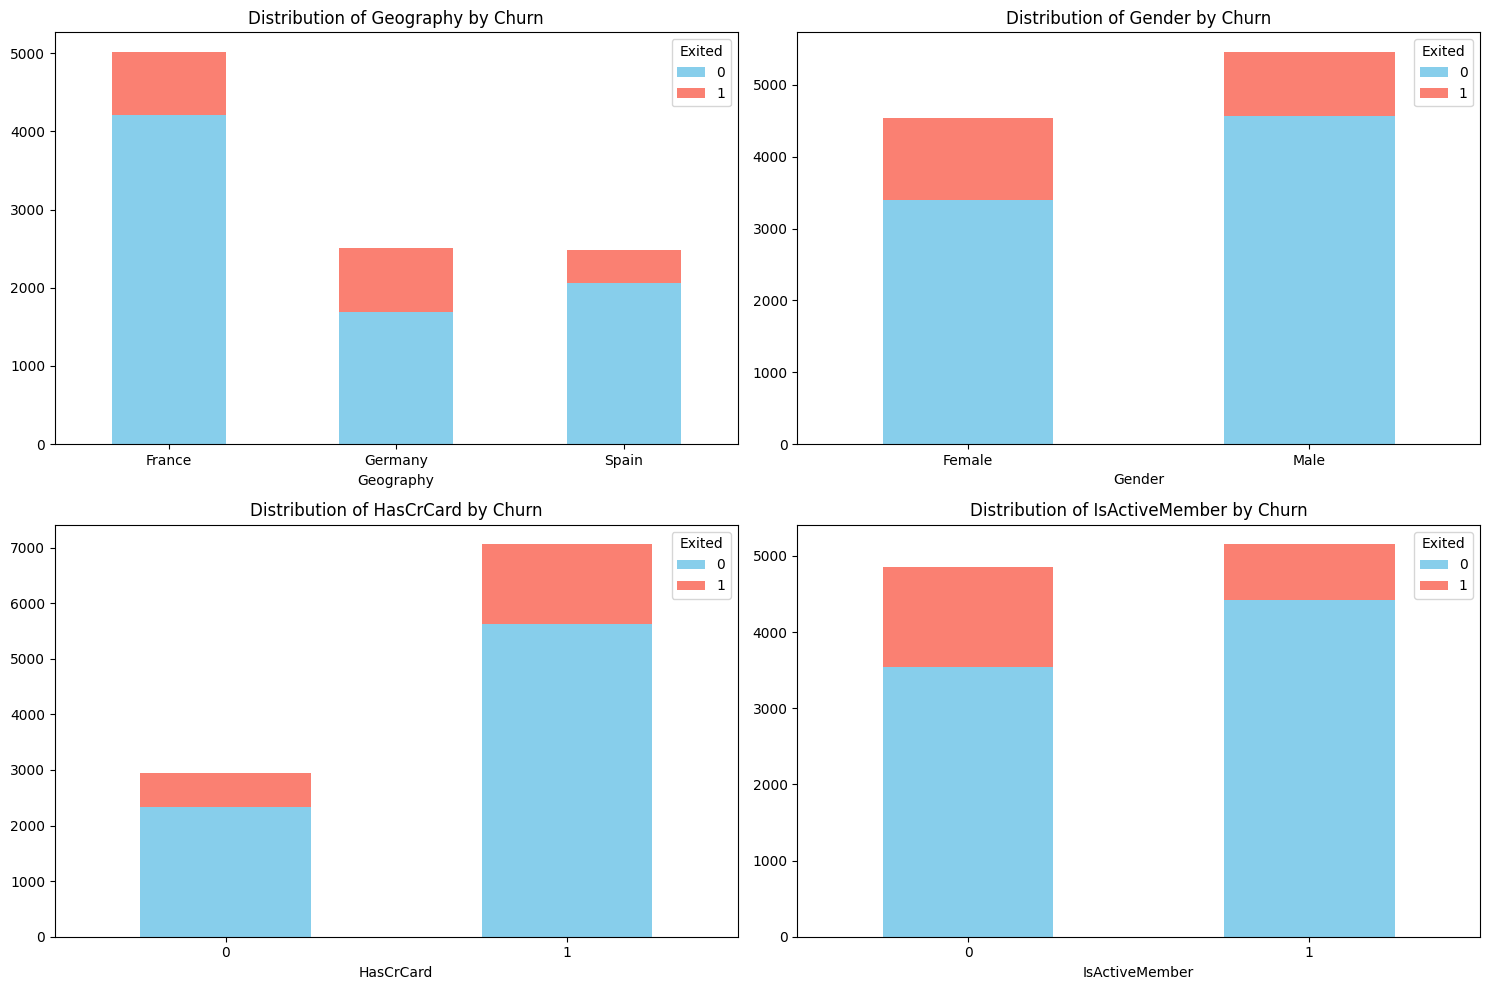

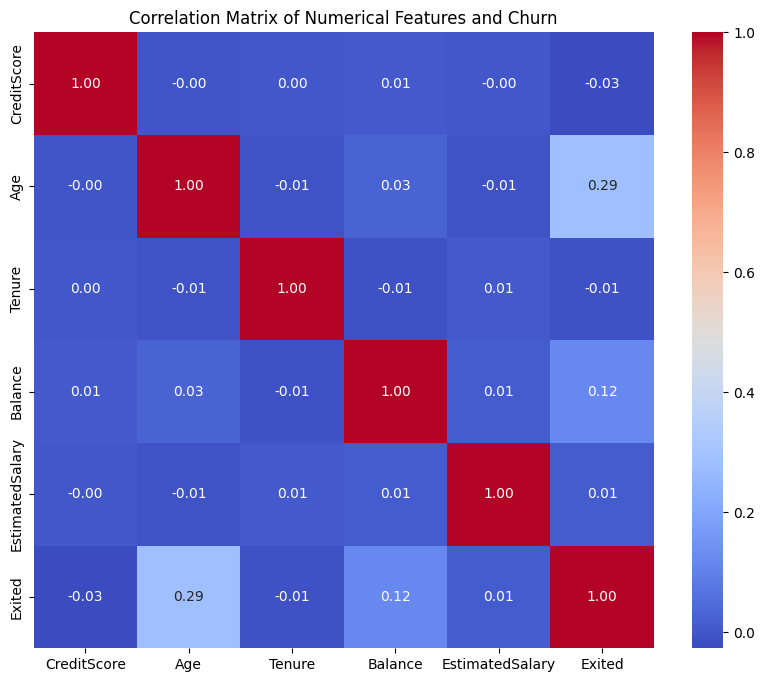

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(15, 10))
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=col, hue='Exited', kde=True, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()


# Box plots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(data=df, x='Exited', y=col, palette=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col} by Churn')
plt.tight_layout()
plt.show()

# Bar charts for categorical features
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features):
    plt.subplot(2, 2, i + 1)
    churn_counts = df.groupby([col, 'Exited']).size().unstack(fill_value=0)
    churn_counts.plot(kind='bar', stacked=True, ax=plt.gca(), color=['skyblue', 'salmon'])
    plt.title(f'Distribution of {col} by Churn')
    plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_features + ['Exited']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features and Churn')
plt.show()

In [8]:
## drop the un-neccesary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
## label encoding in gender column by their classes
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

print(df['Gender'])

0       0
1       0
2       0
3       0
4       0
       ..
9995    1
9996    1
9997    0
9998    1
9999    0
Name: Gender, Length: 10000, dtype: int32


In [10]:
## create the label encoding file for transforming gender class into 0 and 1
import pickle

with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder, file)

In [11]:
### one hot encoding in geography tabel 
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
df_geography = one_hot_encoder.fit_transform(df[['Geography']])
df_geography

<10000x3 sparse matrix of type '<class 'numpy.float64'>'
	with 10000 stored elements in Compressed Sparse Row format>

In [12]:
df_geography.toarray()

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [13]:
## get features after transforming the geography class
one_hot_encoder.get_feature_names_out(['Geography'])


### Now concatenate it in the actual dataset and drop the geography class
geo_df = pd.DataFrame(df_geography.toarray(), columns= one_hot_encoder.get_feature_names_out(['Geography']))
geo_df.head()


,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [14]:
df = pd.concat([df.drop('Geography', axis=1), geo_df], axis=1)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [15]:
## create the one hot encoder file
with open('one_hot_encoder_geography.pkl', 'wb') as file:
    pickle.dump(one_hot_encoder, file)

### Divide the train data and test data 

In [16]:
## import the libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('Exited', axis=1)
y = df['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=2809)


## scale the data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)


In [17]:
## pickle file for sclaer instance
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [18]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


### ANN Implementaion using Tensorflow

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, TensorBoard
from keras import layers
import datetime

In [20]:
#without dropout
model = Sequential([
    Dense(64, activation='relu', input_shape = (x_train.shape[1],)), # 1st hidden layer
    Dense(32, activation='relu'), # 2nd hidden layer
    Dense(16, activation= 'relu'), #3rd hidden layer
    Dense(8, activation= 'relu'), #4th hidden layer
    Dense(1,activation='sigmoid') 
])



## with dropout 
model_1 = Sequential([
    Dense(64, activation='relu', input_shape = (x_train.shape[1],)), # 1st hidden layer
    Dense(32, activation='relu'), # 2nd hidden layer
    layers.Dropout(0.2),
    Dense(16, activation= 'relu'), #3rd hidden layer
    Dense(8, activation = 'relu'), #4th hidden layer
    Dense(1,activation='sigmoid') 
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                832       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (14.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                832       
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_7 (Dense)             (None, 16)                528       
                                                                 
 dense_8 (Dense)             (None, 8)                 136       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3585 (14.00 KB)
Trainable params: 3585 (

In [23]:
os = tf.keras.optimizers.Adamax(learning_rate=0.01)

In [24]:
## compile the model
model.compile(optimizer=os, loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
## now tensorboard to capture the logs

log_dir = "logs/fit" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") 
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [26]:
## set up the early stopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=8, restore_best_weights=True)

In [27]:
## fit the model
history = model.fit(
    x_train, y_train, epochs = 50, validation_data=(x_test, y_test), callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/50
63/63 [==============================] - 3s 18ms/step - loss: 0.4815 - accuracy: 0.7925 - val_loss: 0.4342 - val_accuracy: 0.7995
Epoch 2/50
63/63 [==============================] - 1s 11ms/step - loss: 0.4303 - accuracy: 0.8050 - val_loss: 0.4114 - val_accuracy: 0.8254
Epoch 3/50
63/63 [==============================] - 1s 14ms/step - loss: 0.3986 - accuracy: 0.8330 - val_loss: 0.3908 - val_accuracy: 0.8342
Epoch 4/50
63/63 [==============================] - 1s 12ms/step - loss: 0.3686 - accuracy: 0.8475 - val_loss: 0.3669 - val_accuracy: 0.8489
Epoch 5/50
63/63 [==============================] - 1s 11ms/step - loss: 0.3441 - accuracy: 0.8620 - val_loss: 0.3641 - val_accuracy: 0.8540
Epoch 6/50
63/63 [==============================] - 1s 10ms/step - loss: 0.3360 - accuracy: 0.8640 - val_loss: 0.3703 - val_accuracy: 0.8500
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.3268 - accuracy: 0.8660 - val_loss: 0.3740 - val_accuracy: 0.8403
Epoch 8/50
63

In [28]:
from keras.optimizers.legacy import Adamax
os_drop = Adamax(learning_rate=0.01)

In [29]:
## compile the model with dropout
model_1.compile(optimizer=os_drop, loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
## fit the model with dropout
history_1 = model_1.fit(
    x_train, y_train, epochs = 50, validation_data=(x_test, y_test), callbacks=[tensorflow_callback, early_stopping_callback]
)

Epoch 1/50
63/63 [==============================] - 2s 15ms/step - loss: 0.5043 - accuracy: 0.7760 - val_loss: 0.4299 - val_accuracy: 0.8035
Epoch 2/50
63/63 [==============================] - 1s 13ms/step - loss: 0.4461 - accuracy: 0.8040 - val_loss: 0.4138 - val_accuracy: 0.8145
Epoch 3/50
63/63 [==============================] - 1s 11ms/step - loss: 0.4196 - accuracy: 0.8190 - val_loss: 0.3895 - val_accuracy: 0.8379
Epoch 4/50
63/63 [==============================] - 1s 11ms/step - loss: 0.3933 - accuracy: 0.8375 - val_loss: 0.3722 - val_accuracy: 0.8543
Epoch 5/50
63/63 [==============================] - 1s 13ms/step - loss: 0.3663 - accuracy: 0.8465 - val_loss: 0.3659 - val_accuracy: 0.8541
Epoch 6/50
63/63 [==============================] - 1s 14ms/step - loss: 0.3563 - accuracy: 0.8555 - val_loss: 0.3641 - val_accuracy: 0.8561
Epoch 7/50
63/63 [==============================] - 1s 11ms/step - loss: 0.3523 - accuracy: 0.8565 - val_loss: 0.3631 - val_accuracy: 0.8543
Epoch 8/50
63

In [31]:
print(max(history.history['accuracy']))


model.save('model.h5')

0.8884999752044678


c:\Users\VARUN BHATIA\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
